In [1]:
import pandas as pd
df = pd.read_csv('/Users/Owner/Desktop/four_cols.csv', sep=',')

In [2]:
#standarize todas las columnas
cols=df.columns
z_cols=[]
for col in cols:
    df['z_'+col]=(df[col]-df[col].mean())/df[col].std()
    z_cols.append('z_'+col)

<function matplotlib.pyplot.show(*args, **kw)>

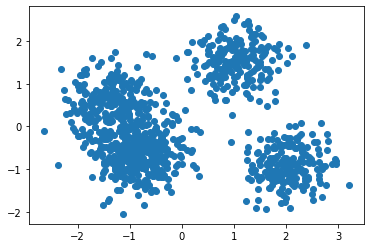

In [3]:
#4. Use PCA para mirar la cluster using PCA
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca=decomposition.PCA(n_components=2)
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[z_cols]))

plt.scatter(df['pc1'],df['pc2'])
plt.show



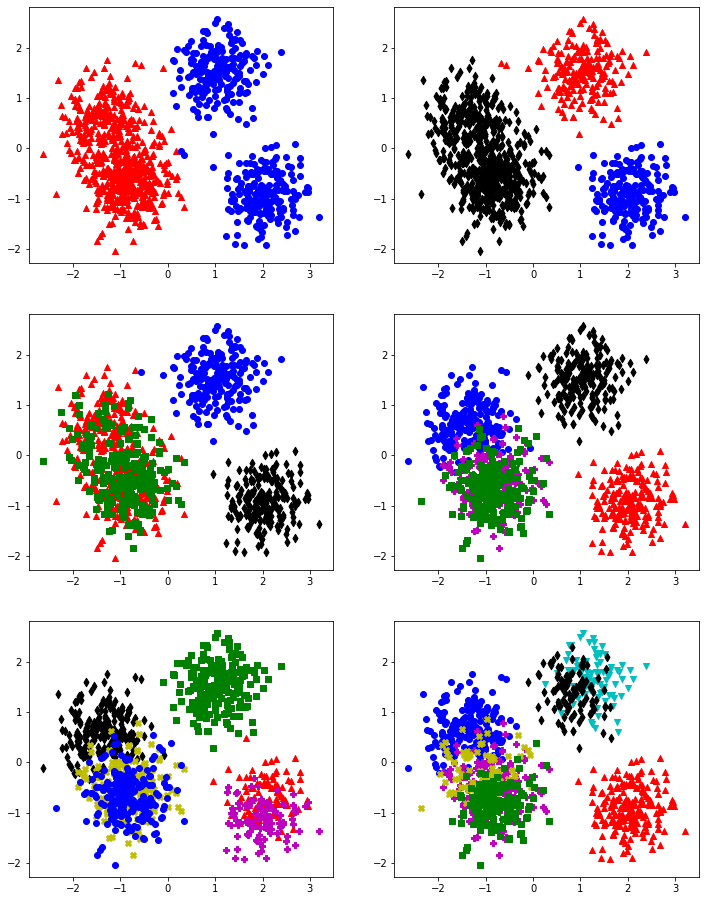

In [4]:
from sklearn import cluster
colors=['r','b','k','g','m','y','c']
markers = ['^', 'o', 'd', 's','P','X','v']

plt.figure(figsize=(12,16))

for n in range(2,8):
  model = cluster.KMeans(n_clusters=n, random_state=10)
  df['cluster'] = model.fit_predict(df[z_cols])
  plt.subplot(3, 2, n-1)
  for c in df['cluster'].unique():
    d = df[df['cluster'] == c]
    plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])
plt.show()

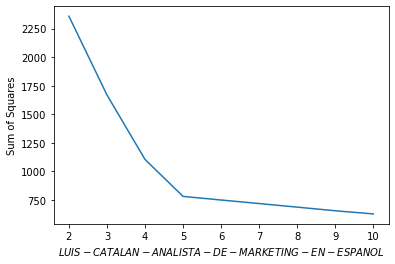

In [8]:
#6 Crear grafico con la suma de los cuadrados del error y mirar por un codo
import numpy as np
ss = []
krange = list(range(2,11))
X = df[z_cols].values
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  model.fit_predict(X)
  cluster_assignments = model.labels_
  centers = model.cluster_centers_
  ss.append(np.sum((X - centers[cluster_assignments]) ** 2))
plt.plot(krange, ss)
plt.xlabel("$LUIS-CATALAN- ANALISTA-DE-MARKETING-EN-ESPANOL$")
plt.ylabel("Sum of Squares")
plt.show()
#SE VE UN QUIEBRE ELBOW EN K=5 OSEA HACER DE CINCO GRUPOS ES ELMEJOR ORDENAMIENTO

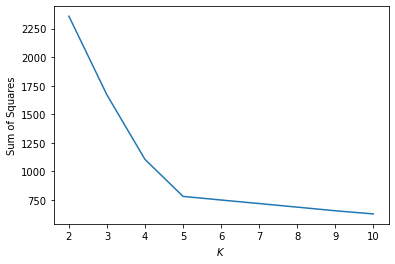

In [12]:
import numpy as np  # DOBLETE 
ss = []
krange = list(range(2,11))
X = df[z_cols].values
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  model.fit_predict(X)
  cluster_assignments = model.labels_
  centers = model.cluster_centers_
  ss.append(np.sum((X - centers[cluster_assignments]) ** 2))
plt.plot(krange, ss)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()